# **Dataset Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Library manipulasi data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library praproses data numerik
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler

# Library pemrosesan teks
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download resource NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Library pengaturan warning
import warnings
warnings.filterwarnings('ignore')

# Library deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.saving import register_keras_serializable

# Library Evaluasi
from sklearn.metrics import precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Memuat Dataset**

In [ ]:
# Load dataset course dari gdrive
course = pd.read_csv('/content/drive/MyDrive/Dicoding/Coursera_dataset/Coursera_courses.csv')
course.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [ ]:
# Load dataset reviews dari gdrive
reviews = pd.read_csv('/content/drive/MyDrive/Dicoding/Coursera_dataset/Coursera_reviews.csv')
reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


**Dataset Understanding:**  

1.**Coursera courses**: Dataset ini berisi daftar 623 kursus yang ada di platform Coursera. Berikut adalah deskripsi dari setiap variabel dalam dataset ini:
  - **name** (karakter): Nama dari kursus.  
  - **institution** (karakter): Nama institusi atau penyedia kursus.  
  - **course_url** (karakter): URL atau tautan menuju halaman kursus.  
  - **course_id** (karakter): Identifikasi unik untuk setiap kursus.

2.**Coursera reviews**: Dataset ini berisi daftar 1.45 juta ulasan beserta dengan rating atau penilaian untuk berbagai kursus di Coursera. Berikut adalah deskripsi dari setiap variabel dalam dataset ini:
  - **reviews** (karakter): Teks ulasan yang diberikan untuk kursus.
  - **reviewers** (karakter): Nama dari pengguna yang menulis ulasan.
  - **date_reviews** (date): Tanggal kapan ulasan tersebut dipublikasikan.
  - **rating** (integer): Skor rating atau penilaian yang diberikan oleh pengguna untuk kursus tersebut.
  - **course_id** (karakter): Identifikasi unik untuk kursus yang diulas.

Dataset **coursera courses** akan digunakan untuk sistem rekomedasi dengan pendekatan content based filtering dan dataset **coursera reviews** untuk pendekatan collaborative filtering.

# **Exploratory Data Analysis**

## **Course EDA**

In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [ ]:
course.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/data-science-co...,data-science-course
freq,2,43,1,1


In [ ]:
# Cek apakah ada course_id yang duplikat
course.duplicated().sum()

np.int64(0)

In [ ]:
# Cek missing value pada course
print("Missing Value pada DataFrame course:")
print(course.isnull().sum())

Missing Value pada DataFrame course:
name           0
institution    0
course_url     0
course_id      0
dtype: int64


In [ ]:
print(f"Jumlah Unique course_id: {len(course['course_id'].unique())}")
print(f"Unique course_id: {course['course_id'].unique()}")

Jumlah Unique course_id: 623
Unique course_id: ['machine-learning' 'indigenous-canada' 'the-science-of-well-being'
 'technical-support-fundamentals' 'google-cbrs-cpi-training'
 'financial-markets-global' 'introduction-psychology' 'python'
 'computer-networking' 'ai-for-everyone' 'python-crash-course'
 'psychological-first-aid' 'neural-networks-deep-learning'
 'what-is-datascience' 'negotiation-skills'
 'uva-darden-project-management' 'project-management' 'brand' 'sciwrite'
 'food-and-health' 'html-css-javascript-for-web-developers'
 'excel-essentials' 'negotiation' 'everyday-excel-part-1'
 'learning-how-to-learn' 'gcp-fundamentals'
 'wharton-contagious-viral-marketing' 'python-data' 'private-equity'
 'learn-korean' 'introduction-tensorflow' 'os-power-user'
 'open-source-tools-for-data-science' 'deep-neural-network'
 'diversity-inclusion-workplace' 'clinical-trials'
 'visual-elements-user-interface-design' 'mafash' 'pap'
 'social-psychology' 'project-planning'
 'computational-thinking-p

In [ ]:
# Menghitung jumlah kursus per institusi
course_per_institution = course['institution'].value_counts()

# Menampilkan distribusi
print("Distribusi Jumlah Kursus per Institusi:\n", course_per_institution)

Distribusi Jumlah Kursus per Institusi:
 institution
University of Pennsylvania             43
University of Michigan                 31
Duke University                        24
Google Cloud                           22
IBM                                    18
                                       ..
Advancing Women in Product              1
The Chinese University of Hong Kong     1
Universitat de Barcelona                1
University of Lausanne                  1
UCL School of Management                1
Name: count, Length: 134, dtype: int64


Pada tahapan EDA terhadap dataset course, terlihat bahwa dataset memiliki 623 baris data. Sekilas, pada fitur name terdapat judul course yang sama, namun ini bukan duplikat karena hanya judulnya saja yang sama, sedangkan fitur lainnya berbeda. Dataset juga aman dari missing value. Pada data name course terlihat sesuai (tidak ada data yang rancu), namun masih mengandung banyak angka dan simbol yang perlu dibersihkan. Selain itu, judulnya tidak hanya dalam bahasa Inggris, tetapi juga terdapat dalam bahasa lain. Distribusi course per institution juga menunjukkan bahwa beberapa institusi mengunggah beberapa course berbeda, yang mungkin bisa menjadi preferensi tambahan jika ingin mengikuti course dari institusi yang sama.

## **Reviews EDA**

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
reviews.describe(include='all')

,reviews,reviewers,date_reviews,rating,course_id
count,1454558,1454711,1454711,1.454711e+06,1454711
unique,458276,287808,1892,NaN,604
top,good,By Deleted A,"May 25, 2020",NaN,python
freq,8827,5412,5394,NaN,45218
mean,NaN,NaN,NaN,4.696649e+00,NaN
std,NaN,NaN,NaN,6.983271e-01,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,5.000000e+00,NaN
50%,NaN,NaN,NaN,5.000000e+00,NaN
75%,NaN,NaN,NaN,5.000000e+00,NaN


In [ ]:
# Mengecek course_id yang belum pernah di review
# Mendapatkan course_id unik dari DataFrame course
course_ids_course = set(course['course_id'])

# Mendapatkan course_id unik dari DataFrame reviews
course_ids_reviews = set(reviews['course_id'])

# Mencari course_id yang ada di course tetapi tidak ada di reviews
unreviewed_courses = course_ids_course - course_ids_reviews

# Menampilkan course_id yang belum di-review
print("Course ID yang belum di-review:")
for course_id in unreviewed_courses:
    print(course_id)

# Menampilkan nama kursus yang belum di-review (opsional)
unreviewed_course_names = course[course['course_id'].isin(unreviewed_courses)]['name']
print("\nNama Kursus yang belum di-review:")
for course_name in unreviewed_course_names:
    print(course_name)

Course ID yang belum di-review:
algorithms-divide-conquer
hotel-distribution
marketing-analytics
international-law-in-action-2
marketing-plan
edinburgh-music-theory
security-safety-globalized-world
changing-global-order
digital-analytics
data-science-course
circular-economy
analytics-tableau
unraveling-the-cycling-city
game-theory-1
probabilistic-graphical-models
introduction-clinical-data
mindfulness
organizational-analysis
dairy-production

Nama Kursus yang belum di-review:
Game Theory
Organizational Analysis
Divide and Conquer, Sorting and Searching, and Randomized Algorithms
Circular Economy - Sustainable Materials Management
Fundamentals of Music Theory
Unraveling the Cycling City
Digital Media and Marketing Strategies
The Changing Global Order
De-Mystifying Mindfulness
Probabilistic Graphical Models 1: Representation
Digital Marketing Analytics in Theory
Data Visualization and Communication with Tableau
International Law In Action: Investigating and Prosecuting International Crim

rating
1      17354
2      16188
3      48303
4     226702
5    1146164
Name: count, dtype: int64


Text(0, 0.5, 'Jumlah Review')

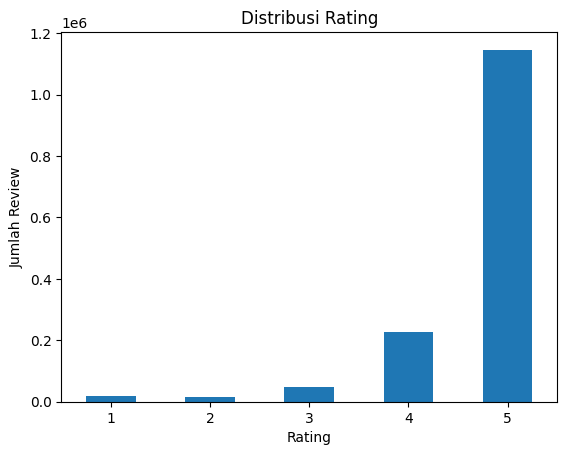

In [ ]:
# Mengecek Distribusi rating
rating_counts = reviews['rating'].value_counts().sort_index()
print(rating_counts)

# Visualisasi distribusi rating
ax = reviews['rating'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah Review")

In [ ]:
# Cek jumlah review per course
review_per_course = reviews['course_id'].value_counts()
review_per_course

,count
course_id,
python,45218
machine-learning,35895
neural-networks-deep-learning,35750
technical-support-fundamentals,35319
python-data,33546
...,...
entrepreneurship-strategy,6
curanderismo-plants,6
entreprise-changement-climatique,6


In [ ]:
# Cek jumlah review per user
review_per_user = reviews['reviewers'].value_counts()
review_per_user

,count
reviewers,
By Deleted A,5412
By Muhammad A,649
By Abhishek S,440
By David M,435
By Michael S,431
...,...
By Kolencherry s s,1
By Seshiria A,1
By Maria,1


In [ ]:
# Mengecek duplikat berdasarkan fitur reviewers dan course_id
reviews.duplicated(subset=['reviewers', 'course_id']).sum()

np.int64(948595)

In [ ]:
# Mengecek apakah rating berbeda-beda untuk duplikat user-course
duplicates = reviews[reviews.duplicated(subset=['reviewers', 'course_id'], keep=False)]
duplicates[['reviewers', 'course_id', 'rating']].groupby(['reviewers', 'course_id']).agg(['count', 'nunique'])

rating  \
                                                                     count   
reviewers                     course_id                                      
By \t M N H                   grammar-punctuation                        3   
By \t M R I                   python-data                                3   
By \t M S R                   guitar                                     3   
By \t N A F B                 uva-darden-digital-product-management      3   
By \t N H P                   speak-english-professionally               3   
...                                                                    ...   
No Upcoming Session Available epigenetics                                2   
Started Oct 05                curanderismo-plants                        2   
                              intro-to-healthcare                        2   
                              social-economic-networks                   2   
Started Sep 28                entrepreneurship-strategy                  2   

                                                                             
                                                                    nunique  
reviewers                     course_id                                      
By \t M N H                   grammar-punctuation                         1  
By \t M R I                   python-data                                 1  
By \t M S R                   guitar                                      1  
By \t N A F B                 uva-darden-digital-product-management       1  
By \t N H P                   speak-english-professionally                1  
...                                                                     ...  
No Upcoming Session Available epigenetics                                 1  
Started Oct 05                curanderismo-plants                         1  
                              intro-to-healthcare                         1  
                              social-economic-networks                    1  
Started Sep 28                entrepreneurship-strategy                   1  

[456709 rows x 2 columns]

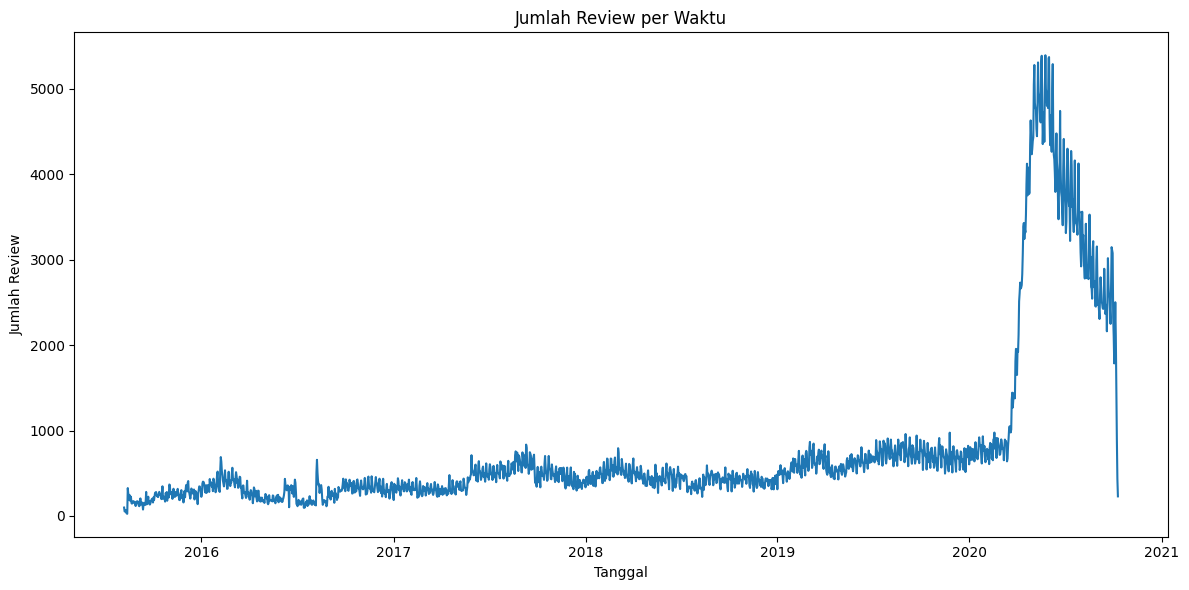

In [ ]:
# Ubah tipe data kolom 'date_reviews' menjadi datetime
reviews['date_reviews'] = pd.to_datetime(reviews['date_reviews'])

# Hitung jumlah review per hari
reviews_per_day = reviews.groupby('date_reviews')['reviews'].count()

# Buat lineplot
plt.figure(figsize=(12, 6))
plt.plot(reviews_per_day.index, reviews_per_day.values)
plt.title('Jumlah Review per Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()

In [ ]:
# Cek missing value pada DataFrame reviews
print("\nMissing Value pada DataFrame reviews:")
print(reviews.isnull().sum())


Missing Value pada DataFrame reviews:
reviews         153
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64


In [ ]:
def hitung_sparsity(df):
    '''Fungsi menghitung nilai elemen dan sparsity dataframe'''
    # Buat matriks user-course, baris = user (reviewers), kolom = course, nilai = rating
    user_course_matrix = df.pivot_table(index='reviewers', columns='course_id', values='rating')

    # Isi nilai NaN (user tidak memberi rating pada course tertentu) dengan 0
    user_course_matrix_filled = user_course_matrix.fillna(0)

    # Hitung total elemen dalam matriks (baris × kolom)
    total_elements = user_course_matrix.size

    # Hitung sparsity: proporsi elemen kosong (tidak ada rating)
    sparsity = 1.0 - (np.count_nonzero(user_course_matrix_filled) / float(total_elements))

    print(f"Total elemen: {total_elements}")
    print(f"Sparsity: {sparsity:.4f}")

hitung_sparsity(reviews)

Total elemen: 173836032
Sparsity: 0.9971


Pada hasil EDA pada dataset reviews terlihat bahwa data terdiri dari 1.454.558 baris data dengan 5 fitur (dengan tipe data 4 object dan 1 int). Pada data juga terdapat fitur course_id yang dapat digunakan untuk menggabungkan reviews_df dengan course_df, namun perlu diperhatikan bahwa course_df memiliki 623 course sedangkan reviews_df hanya memiliki 604. Setelah dicek, ternyata benar terdapat 19 course yang belum pernah direview, sehingga data yang tidak pernah di-review tidak akan digunakan untuk model CF.

Pada fitur rating terlihat adanya ketidakseimbangan data, di mana mayoritas orang memberikan bintang 5. Namun hal ini tidak terlalu berpengaruh untuk sistem rekomendasi, karena jika mayoritas memberikan bintang 5 berarti banyak yang menyukai course. Kemudian, pada review per course terlihat beberapa course populer karena memiliki banyak rating, sedangkan beberapa course lainnya hanya memiliki sedikit rating.

Selanjutnya dilakukan pengecekan review per user dan ditemukan beberapa user yang anomali (kemungkinan duplicate review) karena jumlah review-nya lebih banyak dibanding jumlah course-nya. Setelah dicek duplikat, ternyata benar terdapat 948.595 baris data duplikat. Setelah dicek lebih lanjut, ditemukan beberapa course yang direview 2–3 kali oleh user dengan rating yang sama, yang berarti ini perlu ditangani sebagai duplikat data.

Pada reviews_date, dilakukan pengecekan untuk melihat kebanyakan user melakukan rating dalam rentang tahun berapa, dan terlihat adanya peningkatan pada tahun 2020–2021. Kami juga mengecek missing value dan ditemukan 153 pada fitur reviews, mungkin karena beberapa user memberikan rating tanpa ulasan. Namun, hal ini tidak menjadi masalah karena fitur reviews tidak akan digunakan.

Terakhir, dilakukan pengecekan sparsity untuk mengetahui seberapa banyak course yang tidak diisi rating oleh user. Terlihat jumlah elemen pada matriks adalah 173.836.032 dengan sparsity sebesar 0,9971 yang menunjukkan bahwa banyak user yang hanya mereview sedikit course.

# **Data Preparation**

## **Course Dataset**

In [ ]:
def clean_text(text):
    """Membersihkan teks"""
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'([' + re.escape(string.punctuation) + '])(\S)', r' \2', text)
    text = re.sub(r'[' + re.escape(string.punctuation) + ']', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def casefold_text(text):
    """Mengubah teks menjadi huruf kecil."""
    return text.lower()

def tokenize_text(text):
    """Memecah teks menjadi token-token kata."""
    return word_tokenize(text)

def filtering_text(tokens):
    """Menghapus stopwords dalam teks menggunakan daftar stopwords bahasa Inggris."""
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    return filtered_tokens

lemmatizer = WordNetLemmatizer() # Inisialisasi lemmatizer
def lemmatization_text(tokens):
    """Melakukan lemmatization teks menggunakan WordNetLemmatizer."""
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

def to_sentence(list_words):
    """Mengubah daftar kata menjadi satu kalimat utuh."""
    sentence = ' '.join(word for word in list_words)
    return sentence

def is_ascii(text):
    """Cek apakah teks hanya mengandung karakter ASCII (kemungkinan English)."""
    return all(ord(c) < 128 for c in text)

def preprocessing_text(df, column):
    """Melakukan semua tahapan preprocessing text pada kolom tertentu hanya jika teks ASCII."""
    df = df.copy()

    def process_text(text):
        cleaned = clean_text(text)
        casefolded = casefold_text(cleaned)

        if is_ascii(casefolded):
            tokens = tokenize_text(casefolded)
            filtered = filtering_text(tokens)
            lemmatized = lemmatization_text(filtered)
            return to_sentence(lemmatized)
        else:
            return casefolded

    df[f'{column}_final'] = df[column].apply(process_text)
    return df

def cleaning_text(df, column):
    """Melakukan tahapan cleaning biasa pada kolom tertentu"""
    df = df.copy()
    clean = df[column].apply(clean_text)
    casefolded = clean.apply(casefold_text)
    tokenize = casefolded.apply(tokenize_text)
    filtered = tokenize.apply(filtering_text)
    df[f'{column}_final'] = filtered.apply(to_sentence)
    return df

In [ ]:
# Melakukan preprocessing text
course_id_cleaned = preprocessing_text(course, 'course_id')
course_inst_cleaned = cleaning_text(course, 'institution')

# Menggabungkan DataFrame
course_cleaned = pd.concat([course_inst_cleaned, course_id_cleaned['course_id_final']], axis=1)
course_cleaned.head()

,name,institution,course_url,course_id,institution_final,course_id_final
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,stanford university,machine learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,university alberta,indigenous canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,yale university,science well
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,google,technical support fundamental
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,google spectrum sharing,google cbr cpi training


In [ ]:
# Gabungkan 'course_id_filtered' & 'institution_final' dalam kolom content
course_cleaned['content'] = course_cleaned['course_id_final'] + ' ' + course_cleaned['institution_final']

# Preview hasil
course_cleaned[['name', 'course_id', 'institution', 'content']].head()

,name,course_id,institution,content
0,Machine Learning,machine-learning,Stanford University,machine learning stanford university
1,Indigenous Canada,indigenous-canada,University of Alberta,indigenous canada university alberta
2,The Science of Well-Being,the-science-of-well-being,Yale University,science well yale university
3,Technical Support Fundamentals,technical-support-fundamentals,Google,technical support fundamental google
4,Become a CBRS Certified Professional Installer...,google-cbrs-cpi-training,Google - Spectrum Sharing,google cbr cpi training google spectrum sharing


In [ ]:
# Inisialisasi TfidfVectorizer
tfid = TfidfVectorizer()

# Melakukan fit dan transform ke bentuk matrix
tfidf_matrix = tfid.fit_transform(course_cleaned['content'])

# Mapping array dari fitur index integer ke fitur nama
print(tfidf_matrix.shape)
print(tfid.get_feature_names_out())

(623, 966)
['aboriginal' 'access' 'accounting' 'action' 'actualizacion' 'addiction'
 'addressing' 'administration' 'advanced' 'advancing' 'advertising'
 'advocating' 'age' 'agile' 'ai' 'aid' 'alberta' 'algebra' 'algorithm'
 'algorithmic' 'amazon' 'american' 'amsterdam' 'analysis' 'analytics'
 'anatomy' 'andes' 'animal' 'antibiotic' 'anticorrupcion' 'aplicado'
 'application' 'applied' 'apps' 'aprender' 'aprendiendo' 'arbitration'
 'archaeology' 'architect' 'architectural' 'architecture' 'argument'
 'arizona' 'art' 'arts' 'associate' 'astro' 'atlassian' 'attack'
 'attention' 'audit' 'aulaconstructivista' 'austral' 'autism' 'autisme'
 'autocad' 'autodesk' 'automation' 'autònoma' 'autónoma' 'avanzado' 'aviv'
 'aws' 'azure' 'balancing' 'banking' 'barcelona' 'barrier' 'based' 'basic'
 'batch' 'bayesian' 'bcg' 'becoming' 'behavior' 'behavioral' 'berklee'
 'beverage' 'beyond' 'big' 'bigquery' 'biohacking' 'bioinformatics'
 'biotech' 'bird' 'birkbeck' 'blockchain' 'bocconi' 'bootstrap' 'boulder

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan tfid feature, Baris diisi dengan name course
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=course_cleaned.name
).sample(22, axis=1).sample(10, axis=0)

,melbourne,balancing,probability,front,energy,entrepreneur,contabilidad,osteoarchaeology,crisis,construction,...,college,meaning,george,strategie,manejo,scaling,covid,company,intercultural,chemistry
name,,,,,,,,,,,,,,,,,,,,,
Foundations for Big Data Analysis with SQL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Introduction to Neuroeconomics: How the Brain Makes Decisions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Getting started with TensorFlow 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.314754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fundamental Neuroscience for Neuroimaging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Probabilistic Graphical Models 1: Representation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Python and Statistics for Financial Analysis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biology Meets Programming: Bioinformatics for Beginners,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Building Containerized Applications on AWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Success,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pada dataset course, Secara umum kita hanya melakukan preprocessing untuk membersihkan teks dari simbol dan angka, serta mengecilkan semua huruf agar tidak ada fitur yang redundan.   

Untuk nama course dengan huruf non-ASCII, akan dilakukan preprocessing sampai tahap casefolded saja agar tidak terjadi kesalahan dalam artinya. Sedangkan untuk teks ASCII seperti dalam bahasa Inggris, akan dilanjutkan ke tahapan filtering dan lematisasi untuk mengurangi kompleksitas fitur, dan terakhir akan digabungkan kembali menjadi kalimat dengan nama {column}_final. Khusus untuk institution, hanya dilakukan sampai tahap filtered saja.

Di sini saya melakukan preprocessing pada institution dan course_id saja, karena keduanya diperlukan untuk membuat fitur baru yang bernama content sebagai preferensi isi konten dan pembuatnya. course_id dipilih dibanding name karena hanya memuat kata kunci penting saja.

Selain itu saya juga melakukan ektraksi fitur menggunakan TF-IDF yang bertujuan agar merpresentasikan data text content kedalam bentuk vektor numerik yang dapat diproses untuk model CBF menggunakan cosine similarity.

## **Reviews Dataset**

In [ ]:
# Hapus duplikat user-course yang identik dan pertahankan yang terbaru
reviews_cleaned = reviews.sort_values(by=['date_reviews'], ascending=False)
reviews_cleaned = reviews.drop_duplicates(subset=['reviewers', 'course_id'], keep='first')
reviews_cleaned.shape

(506116, 5)

In [ ]:
# Mengecek Distribusi rating setelah cleaning
rating_clean_counts = reviews_cleaned['rating'].value_counts().sort_index()
print(rating_clean_counts)

rating
1      6589
2      6042
3     17596
4     80337
5    395552
Name: count, dtype: int64


In [ ]:
# Cek jumlah review per user setelah cleaning
review_per_user = reviews_cleaned['reviewers'].value_counts()
review_per_user

,count
reviewers,
By Deleted A,370
By Muhammad A,123
By David M,100
By Michael S,93
By Michael M,88
...,...
By HAITHAM A R A,1
By Elizabeth P D,1
By Daniel P T,1


In [ ]:
# gabungkan course dan reviews berdasarkan kesamaan course_id
course_reviews = pd.merge(course_cleaned, reviews_cleaned, on='course_id', how='inner')
course_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506116 entries, 0 to 506115
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   name               506116 non-null  object
 1   institution        506116 non-null  object
 2   course_url         506116 non-null  object
 3   course_id          506116 non-null  object
 4   institution_final  506116 non-null  object
 5   course_id_final    506116 non-null  object
 6   content            506116 non-null  object
 7   reviews            506058 non-null  object
 8   reviewers          506116 non-null  object
 9   date_reviews       506116 non-null  object
 10  rating             506116 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 42.5+ MB


In [ ]:
# Hitung jumlah rating per user
user_rating_counts = course_reviews.groupby('reviewers')['course_id'].count()

# User yang memberi rating kurang dari 3 course
users_less_than_3 = user_rating_counts[user_rating_counts < 3].index
num_users_less_reviews = len(users_less_than_3)
print(f"Jumlah user yang memberi rating kurang dari 3 course: {num_users_less_reviews}")

# User yang memberi rating 3 course atau lebih
users_3_or_more = user_rating_counts[user_rating_counts >= 3].index
num_users_3_or_more = len(users_3_or_more)
print(f"Jumlah user yang memberi rating 3 course atau lebih: {num_users_3_or_more}")

# Filter dataframe hanya untuk user yang memberi rating 3 course atau lebih
filtered_df = course_reviews[course_reviews['reviewers'].isin(users_3_or_more)].reset_index(drop=True)

# Menghitung reviews yang dilakukan user
reviews_per_course = filtered_df.groupby('reviewers')['course_id'].count()
reviews_per_course.head()

Jumlah user yang memberi rating kurang dari 3 course: 250774
Jumlah user yang memberi rating 3 course atau lebih: 37034


,course_id
reviewers,
By A,4
By A O,3
By B R s,4
By B S K,7
By C S V,4


In [ ]:
# Menghitung sparity setelah di filter
hitung_sparsity(filtered_df)

Total elemen: 22331502
Sparsity: 0.9904


In [ ]:
# Scaling rating dengan MinMaxScaler()
scaler = MinMaxScaler()

# Fit dan transform data rating
filtered_df['rating_normalized'] = scaler.fit_transform(filtered_df[['rating']])

In [ ]:
# Encoding reviewers
user_ids = filtered_df['reviewers'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
filtered_df['user_encoded'] = filtered_df['reviewers'].map(user_to_user_encoded)

# Encoding course_id
course_ids = filtered_df['course_id'].unique().tolist()
course_to_course_encoded = {x: i for i, x in enumerate(course_ids)}
course_encoded_to_course = {i: x for i, x in enumerate(course_ids)}
filtered_df['course_encoded'] = filtered_df['course_id'].map(course_to_course_encoded)

# Informasi dasar dataset
num_users = len(user_to_user_encoded)
num_courses = len(course_to_course_encoded)
min_rating = filtered_df['rating'].min()
max_rating = filtered_df['rating'].max()

print(f'Number of Users: {num_users}')
print(f'Number of Courses: {num_courses}')
print(f'Min Rating: {min_rating}')
print(f'Max Rating: {max_rating}')

# Hasil encoding
filtered_df[['reviewers', 'user_encoded', 'course_id', 'course_encoded', 'rating', 'rating_normalized']].head()

Number of Users: 37034
Number of Courses: 603
Min Rating: 1
Max Rating: 5


,reviewers,user_encoded,course_id,course_encoded,rating,rating_normalized
0,By Deleted A,0,machine-learning,0,1,0.0
1,By Bruno C,1,machine-learning,0,1,0.0
2,By Mathew L,2,machine-learning,0,1,0.0
3,By Rui C,3,machine-learning,0,1,0.0
4,By Mehdi A,4,machine-learning,0,1,0.0


In [ ]:
# Mengacak dataset
filtered_df = filtered_df.sample(frac=1, random_state=42)

# Membuat variabel x untuk mencocokkan data user dan course
x = filtered_df[['user_encoded', 'course_encoded']].values

# Membuat variabel y untuk normalized rating
y = filtered_df['rating_normalized'].values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * filtered_df.shape[0])
x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]

print(f"Total Data: {filtered_df.shape[0]}")
print(f"Train Data: {x_train.shape[0]} samples")
print(f"Validation Data: {x_val.shape[0]} samples\n")
print(x, y)

Total Data: 215032
Train Data: 172025 samples
Validation Data: 43007 samples

[[ 1940   411]
 [ 5293   547]
 [ 3972    12]
 ...
 [19023   157]
 [36191   199]
 [28934   130]] [0.25 1.   1.   ... 0.25 1.   1.  ]


Pada reviews_df, kita akan melakukan beberapa preprocessing untuk keperluan model collaborative filtering nantinya. Sebelumnya, pada EDA telah terlihat bahwa terdapat data duplikat dari beberapa reviewers, sehingga kali ini akan dilakukan cleaning terhadap duplikat dan mempertahankan satu data yang paling terbaru untuk menjaga relevansi, sehingga data yang tersisa hanya 506.116 baris data. Distribusi rating juga masih didominasi oleh bintang 5, dan terlihat bahwa jumlah review dari user tidak melebihi jumlah course, bahkan jauh berkurang.

Selanjutnya dilakukan scaling pada fitur rating agar berada dalam rentang 0–1 untuk memudahkan model CF dengan aktivasi sigmoid dalam membedakan suka dan tidak suka terhadap course. Setelah data reviews bersih, kemudian digabungkan dengan course berdasarkan course_id yang sama. Course yang tidak muncul di reviews akan dihilangkan. Setelah data digabungkan, dilakukan encoding terhadap fitur name course dan course_id, dengan hasil encoding yaitu: Number of Users: 287.808 dan Number of Courses: 604.

Karena sparsity-nya tinggi, selanjutnya dilakukan filtering data, di mana untuk collaborative filtering hanya digunakan user yang pernah memberikan rating pada lebih dari atau sama dengan 3 course, dengan jumlah user = 37.034. Terlihat juga bahwa sparsity-nya menjadi lebih baik. Terakhir, dilakukan data splitting dengan membagi data training dan validasi sebesar 80:20, yang sebelumnya telah diacak terlebih dahulu.

# **Model Development**

## **Content Based Filtering**

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.02255159, 0.0263455 , ..., 0.02216335, 0.        ,
        0.02276873],
       [0.02255159, 1.        , 0.0191548 , ..., 0.01611411, 0.        ,
        0.01655427],
       [0.0263455 , 0.0191548 , 1.        , ..., 0.01882503, 0.        ,
        0.21010582],
       ...,
       [0.02216335, 0.01611411, 0.01882503, ..., 1.        , 0.        ,
        0.01626927],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02276873, 0.01655427, 0.21010582, ..., 0.01626927, 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa name course
cosine_sim_df = pd.DataFrame(cosine_sim, index=course_cleaned['name'], columns=course_cleaned['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap course
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (623, 623)


name,Music Business Foundations,Introduction to Personal Branding,How to Manage a Remote Team,"HTML, CSS, and Javascript for Web Developers",COVID-19: What You Need to Know (CME Eligible)
name,,,,,
Finding Purpose and Meaning In Life: Living for What Matters Most,0.0,0.013230,0.0,0.009001,0.0
Search Engine Optimization Fundamentals,0.0,0.018034,0.0,0.012269,0.0
Indigenous Canada,0.0,0.016838,0.0,0.011456,0.0
"Advanced Valuation and Strategy - M&A, Private Equity, and Venture Capital",0.0,0.014038,0.0,0.009551,0.0
Crash Course on Python,0.0,0.000000,0.0,0.000000,0.0
Nutrition and Lifestyle in Pregnancy,0.0,0.000000,0.0,0.000000,0.0
Wind Energy,0.0,0.013127,0.0,0.008931,0.0
Financing and Investing in Infrastructure,0.0,0.000000,0.0,0.000000,0.0
Troubleshooting and Debugging Techniques,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
# Ambil baris name course tertentu dalam course_cleaned
course_cleaned[course_cleaned.name.eq('Machine Learning')]

,name,institution,course_url,course_id,institution_final,course_id_final,content
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,stanford university,machine learning,machine learning stanford university


In [ ]:
def course_recommendations(name_course, similarity_data=cosine_sim_df, items=course_cleaned, k=5):
    """
    Rekomendasi course berdasarkan kemiripan konten dengan evaluasi precision, recall, dan F1-score.
    """

    # Ambil index course dengan kemiripan tertinggi (top-k)
    index = similarity_data.loc[:, name_course].to_numpy().argpartition(range(-1, -k, -1))

    # Ambil nama-nama course dengan skor tertinggi
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Hilangkan course asal dari hasil rekomendasi
    closest = closest.drop(name_course, errors='ignore')

    # Gabungkan dengan data course untuk detail, ambil top-k hasil
    recommended_courses = pd.DataFrame(closest).merge(items).head(k)

    # Ambil tags atau content untuk kursus yang dicari
    target_tags = set(items.loc[items['name'] == name_course, 'content'].values[0].split())

    # Cek relevansi berdasarkan kesamaan tag atau konten
    recommended_courses['relevant'] = recommended_courses['content'].apply(
        lambda x: len(target_tags.intersection(set(x.split()))) > 0)

    # Menghitung Precision, Recall, dan F1-score
    y_true = [1] * len(recommended_courses)  # Semua rekomendasi relevan (karena kita anggap sebagai ground truth)
    y_pred = recommended_courses['relevant'].astype(int)  # 1 jika relevan, 0 jika tidak relevan

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Cetak hasil evaluasi
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')

    return recommended_courses

In [ ]:
# Mendapatkan rekomendasi nama course yang mirip dengan evaluasi precision, recall, dan F1-score
recommended_courses = course_recommendations('Machine Learning')

# Menampilkan rekomendasi yang dihasilkan
print("Recommended Courses:")
recommended_courses

Precision: 1.00
Recall: 1.00
F1-score: 1.00
Recommended Courses:


,name,institution,course_url,course_id,institution_final,course_id_final,content,relevant
0,Fundamentals of Machine Learning for Healthcare,Stanford University,https://www.coursera.org/learn/fundamental-mac...,fundamental-machine-learning-healthcare,stanford university,fundamental machine learning healthcare,fundamental machine learning healthcare stanfo...,True
1,Applied Machine Learning in Python,University of Michigan,https://www.coursera.org/learn/python-machine-...,python-machine-learning,university michigan,python machine learning,python machine learning university michigan,True
2,Machine Learning with Python,IBM,https://www.coursera.org/learn/machine-learnin...,machine-learning-with-python,ibm,machine learning python,machine learning python ibm,True
3,Introduction to Machine Learning,Duke University,https://www.coursera.org/learn/machine-learnin...,machine-learning-duke,duke university,machine learning duke,machine learning duke duke university,True
4,Machine Learning for All,University of London,https://www.coursera.org/learn/uol-machine-lea...,uol-machine-learning-for-all,university london,uol machine learning,uol machine learning university london,True


Pada Content-Based Filtering (CBF), dilakukan ekstraksi fitur menggunakan metode TF-IDF, kemudian dihitung cosine similarity-nya. Hasil rekomendasi yang diuji menunjukkan bahwa input dengan kata kunci "Machine Learning" menghasilkan rekomendasi yang relevan dan sesuai dengan konteks Machine Learning dari hasil evaluasi relevansinya juga terlihat precision, recall dan F1-scorenya bernilai 1.

Model CBF digunakan untuk mengatasi masalah cold start, khususnya pada kasus di mana user memiliki jumlah rating yang rendah (kurang dari 3 course), sebagaimana telah teridentifikasi dalam analisis reviews dataset. Dalam situasi seperti ini, Collaborative Filtering tidak cukup informasi untuk memberikan rekomendasi, sehingga pendekatan berbasis konten menjadi solusi yang lebih efektif.

Selain itu, apabila pengguna ingin mendapatkan rekomendasi berdasarkan kemiripan isi atau topik antar course, maka pendekatan CBF memang lebih tepat digunakan dibandingkan CF, yang lebih fokus pada pola preferensi antar pengguna.

## **Collaborative Filtering**

In [ ]:
@register_keras_serializable()
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_courses, embedding_size=32, **kwargs):
        """
        Inisialisasi model RecommenderNet.

        Args:
            num_users: Jumlah total pengguna.
            num_courses: Jumlah total kursus.
            embedding_size: Ukuran dimensi embedding (default: 64).
            **kwargs: Argumen keyword tambahan untuk kelas induk.
        """
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_courses = num_courses
        self.embedding_size = embedding_size

        # Membuat embedding vector untuk setiap user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal", # Inisialisasi bobot awal
            embeddings_regularizer=keras.regularizers.l2(1e-4) # Regularisasi untuk mencegah overfitting
        )
        self.user_bias = layers.Embedding(num_users, 1) # Bias user untuk menyesuaikan preferensi rata-rata

        # Membuat embedding vector untuk setiap course
        self.course_embedding = layers.Embedding(
            num_courses,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-4)
        )
        self.course_bias = layers.Embedding(num_courses, 1)  # Bias course untuk menyesuaikan popularitas rata-rata

    def call(self, inputs):
        """
        Forward pass model untuk menghasilkan prediksi rating.
        """
        # Mengambil embedding vector dan bias berdasarkan indeks user dan course
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        course_vector = self.course_embedding(inputs[:, 1])
        course_bias = self.course_bias(inputs[:, 1])

        # Melakukan dot product antara user dan course embedding vector
        dot_user_course = tf.tensordot(user_vector, course_vector, 2)

        # Menambahkan bias user dan course ke hasil dot product
        x = dot_user_course + user_bias + course_bias

        # Aktivasi sigmoid untuk hasil antara 0–1 (probabilitas user menyukai course)
        return tf.nn.sigmoid(x)

    def get_config(self):
        """
        Mengembalikan dictionary konfigurasi model untuk serialisasi atau penyimpanan.
        """
        config = super(RecommenderNet, self).get_config()
        config.update({
            "num_users": self.num_users,
            "num_courses": self.num_courses,
            "embedding_size": self.embedding_size,
        })
        return config

    @classmethod
    def from_config(cls, config):
        """
        Membuat model objek dari konfigurasi.
        """
        return cls(**config)

In [ ]:
class CustomModelCheckpoint(Callback):
    def __init__(self, loss_tolerance=0.01):
        super(CustomModelCheckpoint, self).__init__()
        self.best_rmse = float("inf")
        self.best_loss = float("inf")
        self.loss_tolerance = loss_tolerance

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_rmse = logs.get("val_root_mean_squared_error", float("inf"))
        val_loss = logs.get("val_loss", float("inf"))

        # Log detail tentang performa setiap epoch
        print(f"[Epoch {epoch+1}] val_rmse: {val_rmse:.4f}, val_loss: {val_loss:.4f}")

        # Simpan model jika RMSE atau loss membaik dalam toleransi
        if (val_rmse < self.best_rmse or
            (val_rmse == self.best_rmse and val_loss < self.best_loss + self.loss_tolerance)):
            self.best_rmse = val_rmse
            self.best_loss = val_loss

            # Simpan model
            model_save_path = f"best_model.keras"
            self.model.save(model_save_path)
            print(f"[Epoch {epoch+1}] Model disimpan di {model_save_path} dengan val_rmse: {val_rmse:.4f}, val_loss: {val_loss:.4f}")

# Inisialisasi Callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
custom_checkpoint = CustomModelCheckpoint(loss_tolerance=0.01)

In [ ]:
# Inisialisasi model
model = RecommenderNet(num_users=num_users, num_courses=num_courses)

# Compile model menggunakan RMSprop
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr, early_stopping, custom_checkpoint]
)

Epoch 1/100
5376/5376 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5625 - root_mean_squared_error: 0.3722[Epoch 1] val_rmse: 0.2087, val_loss: 0.3426
[Epoch 1] Model disimpan di best_model.keras dengan val_rmse: 0.2087, val_loss: 0.3426
5376/5376 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.5625 - root_mean_squared_error: 0.3722 - val_loss: 0.3426 - val_root_mean_squared_error: 0.2087 - learning_rate: 0.0010
Epoch 2/100
5363/5376 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3322 - root_mean_squared_error: 0.2033[Epoch 2] val_rmse: 0.2036, val_loss: 0.3264
[Epoch 2] Model disimpan di best_model.keras dengan val_rmse: 0.2036, val_loss: 0.3264
5376/5376 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 0.3322 - root_mean_squared_error: 0.2033 - val_loss: 0.3264 - val_root_mean_squared_error: 0.2036 - learning_rate: 0.0010
Epoch 3/100
5367/5376 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3200 - root_mean_squared_error: 0.1999[Epoch 3] val_rmse: 0.2006, val_loss: 0.3169
[Epoch 3] Model disimpan di best_m

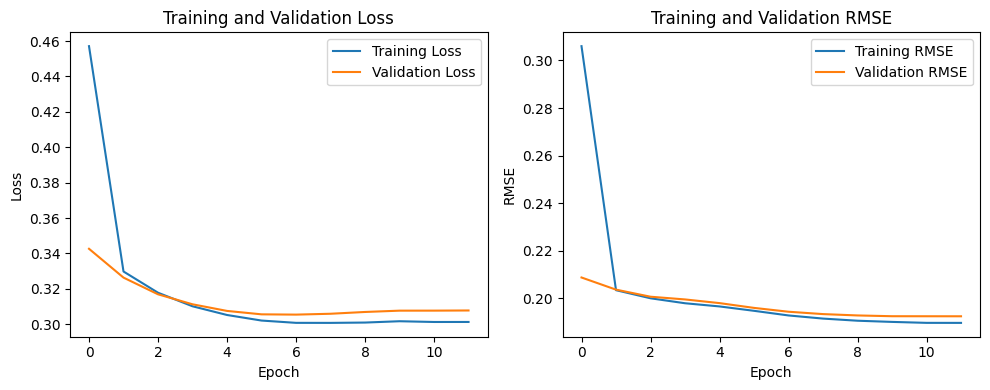

In [ ]:
# Plot history loss dan val_loss
plt.figure(figsize=(10, 4)) # Create the figure first with figsize
plt.subplot(1, 2, 1) # Then create the subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot history root_mean_squared_error dan val_root_mean_squared_error
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **Menghasilkan Rekomendasi**

In [ ]:
# Mengambil sample user (reviewers)
user_id = filtered_df.reviewers.sample(1).iloc[0]
courses_taken_by_user = filtered_df[filtered_df.reviewers == user_id]

# Course yang belum pernah diambil oleh user
courses_not_taken = filtered_df[~filtered_df['course_id'].isin(courses_taken_by_user.course_id.values)]['course_id']
courses_not_taken = list(
    set(courses_not_taken)
    .intersection(set(course_to_course_encoded.keys()))
)

courses_not_taken = [[course_to_course_encoded.get(x)] for x in courses_not_taken]
user_encoder = user_to_user_encoded.get(user_id)
user_course_array = np.hstack(
    ([[user_encoder]] * len(courses_not_taken), courses_not_taken)
)

In [ ]:
ratings = model.predict(user_course_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_course_ids = [
    course_encoded_to_course.get(courses_not_taken[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for user: {}'.format(user_id))
print('===' * 9)
print('Courses with high ratings from user')
print('----' * 8)

top_courses_user = (
    courses_taken_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .course_id.values
)

course_df_rows = course_cleaned[course_cleaned['course_id'].isin(top_courses_user)]
for row in course_df_rows.itertuples():
    print(row.name, ':', row.institution)

print('----' * 8)
print('Top 10 course recommendation')
print('----' * 8)

recommended_courses = course_cleaned[course_cleaned['course_id'].isin(recommended_course_ids)]
for row in recommended_courses.itertuples():
    print(row.name, ':', row.institution)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Showing recommendations for user: By Anna M
Courses with high ratings from user
--------------------------------
Psychological First Aid : Johns Hopkins University
Fashion as Design : The Museum of Modern Art
Excel/VBA for Creative Problem Solving, Part 1 : University of Colorado Boulder
The Technology of Music Production : Berklee College of Music
Osteoarchaeology: The Truth in Our Bones : Universiteit Leiden
--------------------------------
Top 10 course recommendation
--------------------------------
The Science of Well-Being : Yale University
Excel Skills for Business: Essentials : Macquarie University
First Step Korean : Yonsei University
Introduction to Psychology : University of Toronto
English for Career Development : University of Pennsylvania
Positive Psychology: Martin E. P. Seligman’s Visionary Science : University of Pennsylvania
Excel Skills for Business: Intermediate I : Macquarie University
Introduction to Programming with MATLAB 

Pada model Collaborative Filtering (CF), digunakan arsitektur Recommender Net dengan embedding size 32. Selama pelatihan, diterapkan callback seperti reduce_lr, early stopping, dan custom checkpoint untuk meningkatkan efisiensi dan menghindari overfitting. Model dilatih menggunakan loss berupa Binary Crossentropy, dengan optimizer RMSprop, karena sebelumnya penggunaan Adam dan AdamW menghasilkan overfitting yang parah. Selain itu, metrik tambahan yang digunakan adalah Root Mean Squared Error (RMSE) untuk mengukur seberapa baik model dalam memprediksi nilai sebenarnya.

Model dilatih dengan batch size 32 untuk efisiensi pelatihan karena sebelumnya 16 terlalu lama dan 64 mengalami overfitting. Setelah proses pelatihan selesai, hasil yang didapatkan adalah:
- loss: 0.3024
- root_mean_squared_error: 0.1896
- val_loss: 0.3078
- val_root_mean_squared_error: 0.1924

Hasil metrik ini sudah cukup baik untuk model sistem rekomendasi yang dihasilkan.

Adapun hasil rekomendasi yang dihasilkan berdasarkan sampel pengguna menunjukkan bahwa rekomendasi didasarkan pada preferensi rating yang diberikan oleh pengguna terhadap course yang sama. Model CF ini lebih cocok digunakan untuk user yang telah memberikan banyak ulasan, karena rekomendasi yang diharapkan bukan berdasarkan kemiripan konten, tetapi berdasarkan preferensi yang serupa dengan pengguna lain yang telah mereview lebih banyak course.

**Test Load Model Hasil Training**

Tahapan ini hanya untuk menguji apakah model yang sudah dihasilkan dan di download dapat di load untuk digunakan kembali.

In [ ]:
model = tf.keras.models.load_model(
    '/content/best_model.keras',
    custom_objects={'RecommenderNet': RecommenderNet}
)

In [ ]:
model.summary()

Model: "recommender_net_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 32)             │     1,185,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 1)              │        37,034 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 32)             │        19,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 1)              │           603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,484,044 (9.48 MB)

 Trainable params: 1,242,021 (4.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,242,023 (4.74 MB)